In [11]:
%matplotlib inline
import tensorboard
#path = "D:\INFO\TFG\RSNA_dataset\CBIS_datos\DA\\"
#path = "~/tfg/RSNA/modelos/tests/baseline/"
path = "/home/bifuz/tfg/RSNA/modelos/tests/DADO/"
%reload_ext tensorboard
%tensorboard --logdir "/home/bifuz/tfg/RSNA/modelos/tests/baseline/runs/"

In [251]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import pandas as pd
import numpy as np

SUBTITULOS = {'fontsize': 18}
TITULOS = {'fontsize': 18}
eps = 0.05

def plot(df, t = True):

    if t: labels = ["Epochs", "Validation Accuracy"]
    else: labels = ["Iteración", "Pérdida"]
    
    # Extraer valores
    x = df['Step']
    y = df['Value']

    # Suavizado con filtro gaussiano
    y_smooth = gaussian_filter1d(y, sigma=1.5 if t else 3)

    # Encontrar el punto máximo
    max_idx = y.idxmax()
    x_max = x[max_idx]
    y_max = y[max_idx]


    # Plot
    plt.figure(figsize=(8, 6))
    #plt.style.use('grayscale')
    plt.plot(x, y, color='#1f77b4', label=labels[1], alpha=1 if t else 0.6)
    plt.plot(x, y_smooth, color='#1f77b4' if t else 'red', alpha=0.4 if t else 0.8, linewidth=3, label='Suavizado')
    # Dibujar texto en el punto más alto
    if t:
        plt.text(x_max, y_max + 0.01,  # un poco por encima
            f"Max: {y_max:.3f}",
            fontsize=10, color='black', ha='center')


    plt.xlabel(labels[0], fontdict=SUBTITULOS)
    plt.ylabel(labels[1], fontdict=SUBTITULOS)
    plt.yticks(np.arange(round(df['Value'].min(), 2) - eps, round(df['Value'].max(), 2) + 0.1, (y_max - round(df['Value'].min(), 2)) / 4))
    #plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [272]:
path = '/mnt/d/INFO/TFG/RSNA_dataset/CBIS_datos/orientacion_fija/'

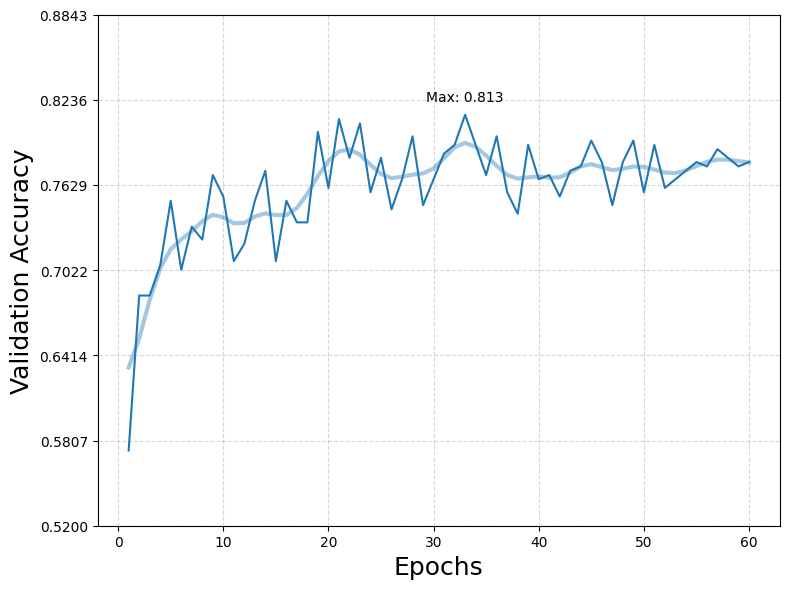

In [252]:
plot(pd.read_csv(path + 'val_acc.csv'), 'Validation Accuracy')

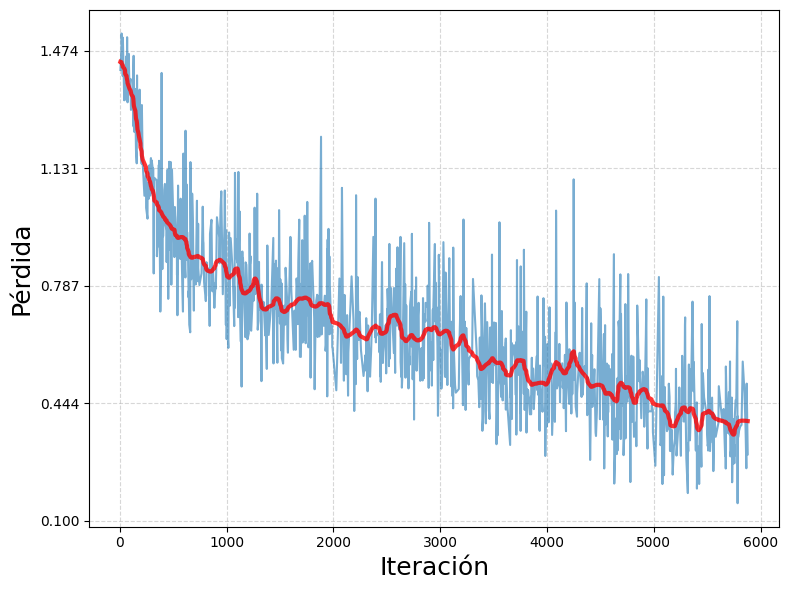

In [203]:
plot(pd.read_csv(path + 'train_loss.csv'), False)

In [12]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import pandas as pd
import numpy as np

SUBTITULOS = {'fontsize': 18}
TITULOS = {'fontsize': 18}
eps = 0.05

def plot(val, loss):

    v = pd.read_csv(val)
    l = pd.read_csv(loss)
    
    
    # Extraer valores
    x = v['Step']
    y = v['Value']

    # Suavizado con filtro gaussiano
    y_smooth = gaussian_filter1d(y, sigma=1.5)
    yl_smooth = gaussian_filter1d(l['Value'], sigma=6.5)
    
    # Encontrar el punto máximo
    max_idx = y.idxmax()
    x_max = x[max_idx]
    y_max = y[max_idx]


    # Plot
    plt.figure(figsize=(12, 6))
    #plt.style.use('grayscale')

    # Validation Accuracy
    plt.subplot(1,2,1)
    plt.plot(x, y, color='#1f77bF', alpha=1)
    
    plt.plot(x, y_smooth, color='#FF6666', alpha=0.8, linewidth=3, label='Suavizado')
    plt.text(x_max, y_max + 0.01,  # un poco por encima
            f"Max: {y_max:.3f}",
            fontsize=10, color='black', ha='center')
    plt.grid(True, linestyle='--', alpha=0.5)
    
    plt.xlabel("Epochs", fontdict=SUBTITULOS)
    plt.ylabel("Validation Accuracy", fontdict=SUBTITULOS)
    plt.yticks(np.arange(round(v['Value'].min(), 2), y_max + eps + 0.02, 0.05))
    plt.yticks(np.arange(0.55, 0.9, 0.1))
        
    plt.subplot(1,2,2)
    plt.plot(l['Step'], l['Value'], color='#1f77bF', alpha=0.8)
    
    plt.plot(l['Step'], yl_smooth, color='#FF6666', alpha=0.95, linewidth=3, label='Suavizado')
    plt.xlabel("Iteration", fontdict=SUBTITULOS)
    plt.ylabel("Loss", fontdict=SUBTITULOS)
    plt.grid(True, linestyle='--', alpha=0.5)
    # Dibujar texto en el punto más alto
      
    plt.tight_layout()
    plt.show()

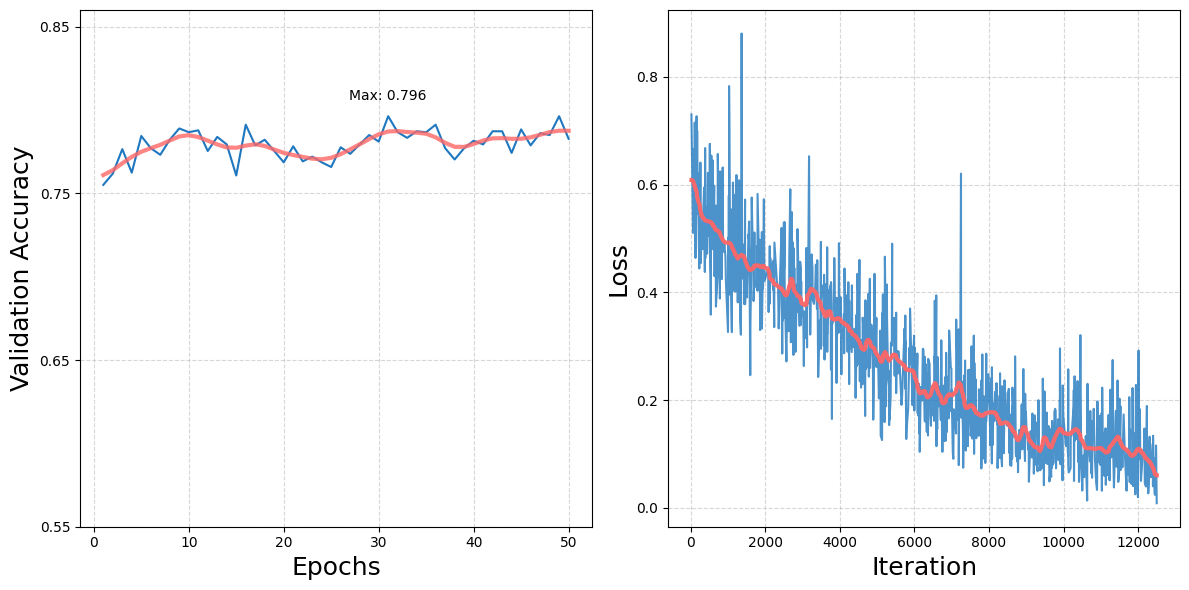

In [13]:
path_ = "/mnt/d/INFO/TFG/RSNA_dataset/RSNA/DA/"
plot(path_ + 'val_acc.csv', path_ + 'train_loss.csv')

In [22]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import pandas as pd
import numpy as np

SUBTITULOS = {'fontsize': 18}
TITULOS = {'fontsize': 18}
eps = 0.05

def plot():

    v_b = pd.read_csv('/mnt/d/INFO/TFG/RSNA_dataset/RSNA/baseline/val_acc.csv')
    l_b = pd.read_csv('/mnt/d/INFO/TFG/RSNA_dataset/RSNA/baseline/train_loss.csv')

    v_DA = pd.read_csv('/mnt/d/INFO/TFG/RSNA_dataset/RSNA/DA/val_acc.csv')
    l_DA = pd.read_csv('/mnt/d/INFO/TFG/RSNA_dataset/RSNA/DA/train_loss.csv')
    
    v_DADO = pd.read_csv('/mnt/d/INFO/TFG/RSNA_dataset/RSNA/DADO/val_acc.csv')
    l_DADO = pd.read_csv('/mnt/d/INFO/TFG/RSNA_dataset/RSNA/DADO/train_loss.csv')

    #v_DADOorientado = pd.read_csv('/mnt/d/INFO/TFG/RSNA_dataset/CBIS_datos/orientacion_fija/val_acc.csv')
    #l_DADOorientado = pd.read_csv('/mnt/d/INFO/TFG/RSNA_dataset/CBIS_datos/orientacion_fija/train_loss.csv')

    v = [v_b, v_DA, v_DADO]#, v_DADOorientado]
    l = [l_b, l_DA, l_DADO]#, l_DADOorientado]
    
    labels = ["Baseline", "Data augmentation", "Data augmentation y drop out"]#, "Orientados"]
    
    colors = ["blue", "orange", "purple"]#, "lime"]
    
    # Extraer valores
    # Suavizado con filtro gaussiano
    #y_smooth = gaussian_filter1d(y, sigma=1.5)
    #yl_smooth = gaussian_filter1d(l['Value'], sigma=6.5)


    # Plot
    plt.figure(figsize=(12, 6))
    #plt.style.use('grayscale')

    # Validation Accuracy
    plt.subplot(1,2,1)

    for v_, label, color in zip(v, labels, colors):
        #plt.plot(v_['Step'], v_['Value'], color=color, alpha=0.9, label=label)
        
        plt.plot(v_['Step'], gaussian_filter1d(v_['Value'], sigma=1.0), color=color, alpha=0.9, linewidth=2, label=label)
        
        max_idx = v_["Value"].idxmax()
        x_max = v_['Step'][max_idx]
        y_max = v_['Value'][max_idx]

    plt.grid(True, linestyle='--', alpha=0.3)
    
    plt.xlabel("Epochs", fontdict=SUBTITULOS)
    plt.ylabel("Validation Accuracy", fontdict=SUBTITULOS)
    plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

    plt.legend()
        
    plt.subplot(1,2,2)

    for l_, label, color in zip(l, labels, colors):
        #plt.plot(l_['Step'], l_['Value'], color='#1f77bF', alpha=0.4)
        
        plt.plot(l_['Step'], gaussian_filter1d(l_['Value'], sigma=13), color=color, alpha=1.0, linewidth=3, label=label)
       
    plt.xlabel("Iteration", fontdict=SUBTITULOS)
    plt.ylabel("Loss", fontdict=SUBTITULOS)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend()
    # Dibujar texto en el punto más alto
      
    plt.tight_layout()
    plt.show()

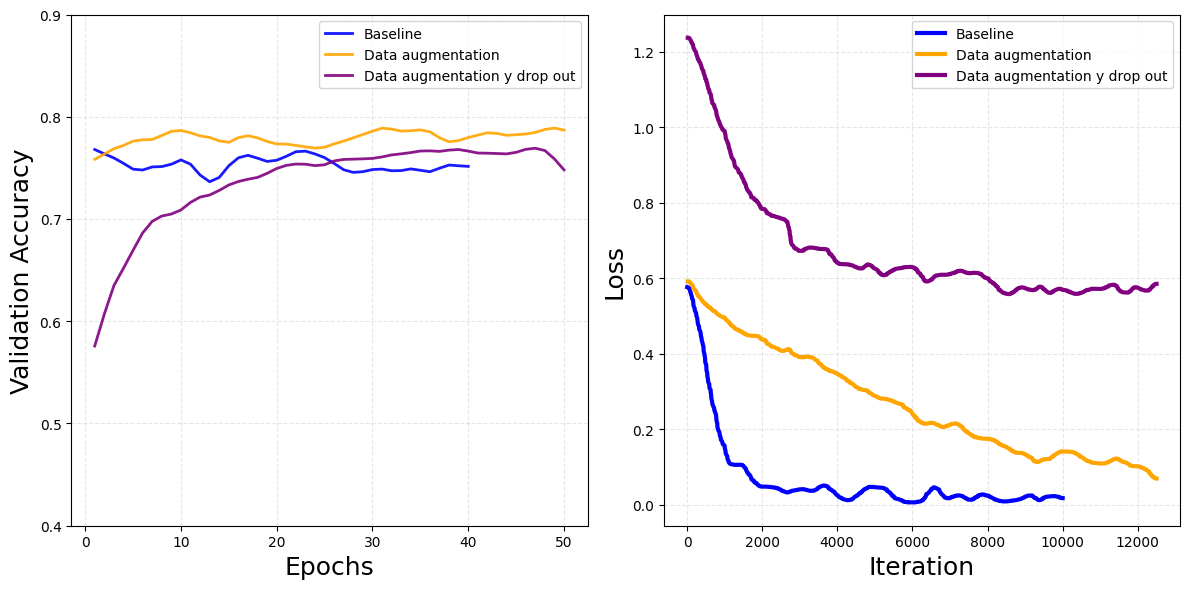

In [23]:
plot()